# Applied Machine Learning Assignment-II

# Libraries

In [230]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier


from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report

from statistics import mean, stdev

# allow plots to appear directly in the notebook
%matplotlib inline

# Dataset: JoiningAnalytics.csv

In [231]:
# keep the csv file in the same location as of ipynb file
# read CSV file 
data = pd.read_csv('JoiningAnalytics.csv')
# display the first 10 rows
data.head(10)


,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined
5,6,2117167,Yes,17,30,E1,42.83,42.83,0.00,No,No,Male,Employee Referral,2,INFRA,Noida,34,Joined
6,7,2119124,Yes,37,30,E2,31.58,31.58,0.00,No,No,Male,Employee Referral,7,INFRA,Noida,32,Joined
7,9,2127572,Yes,16,0,E1,-20.00,-20.00,0.00,No,No,Female,Direct,8,Healthcare,Noida,34,Joined
8,11,2138169,No,1,30,E1,-22.22,-22.22,0.00,No,No,Female,Employee Referral,3,BFSI,Gurgaon,26,Joined
9,12,2143362,No,6,30,E1,240.00,220.00,-5.88,No,No,Male,Employee Referral,3,CSMP,Chennai,34,Joined


In [232]:
# print the shape of the DataFrame
data.shape
     

(9011, 18)

In [233]:
# Type of Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SLNO                         9011 non-null   int64  
 1   Candidate.Ref                9011 non-null   int64  
 2   DOJ.Extended                 9011 non-null   object 
 3   Duration.to.accept.offer     9011 non-null   int64  
 4   Notice.period                9011 non-null   int64  
 5   Offered.band                 9011 non-null   object 
 6   Pecent.hike.expected.in.CTC  9011 non-null   float64
 7   Percent.hike.offered.in.CTC  9011 non-null   float64
 8   Percent.difference.CTC       9011 non-null   float64
 9   Joining.Bonus                9011 non-null   object 
 10  Candidate.relocate.actual    9011 non-null   object 
 11  Gender                       9011 non-null   object 
 12  Candidate.Source             9011 non-null   object 
 13  Rex.in.Yrs        

In [234]:
# Summary of Null values
data.isnull().sum()

SLNO                           0
Candidate.Ref                  0
DOJ.Extended                   0
Duration.to.accept.offer       0
Notice.period                  0
Offered.band                   0
Pecent.hike.expected.in.CTC    0
Percent.hike.offered.in.CTC    0
Percent.difference.CTC         0
Joining.Bonus                  0
Candidate.relocate.actual      0
Gender                         0
Candidate.Source               0
Rex.in.Yrs                     0
LOB                            0
Location                       0
Age                            0
Status                         0
dtype: int64

In [235]:
# As mentioned earlier, we are dropping the below 2 columns which are irrelevant for the prediction model.
data=data.drop(["SLNO","Candidate.Ref"], axis=1)
data.head(10)

,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined
5,Yes,17,30,E1,42.83,42.83,0.00,No,No,Male,Employee Referral,2,INFRA,Noida,34,Joined
6,Yes,37,30,E2,31.58,31.58,0.00,No,No,Male,Employee Referral,7,INFRA,Noida,32,Joined
7,Yes,16,0,E1,-20.00,-20.00,0.00,No,No,Female,Direct,8,Healthcare,Noida,34,Joined
8,No,1,30,E1,-22.22,-22.22,0.00,No,No,Female,Employee Referral,3,BFSI,Gurgaon,26,Joined
9,No,6,30,E1,240.00,220.00,-5.88,No,No,Male,Employee Referral,3,CSMP,Chennai,34,Joined


# Visualizing data distribution of non-numeric features

In [236]:
# Checking categories and distribution of "DOJ.Extended" feature per category
data["DOJ.Extended"].value_counts()


No     4802
Yes    4209
Name: DOJ.Extended, dtype: int64

Status        Joined  Not Joined
DOJ.Extended                    
No              3893         909
Yes             3433         776


<AxesSubplot:xlabel='DOJ.Extended'>

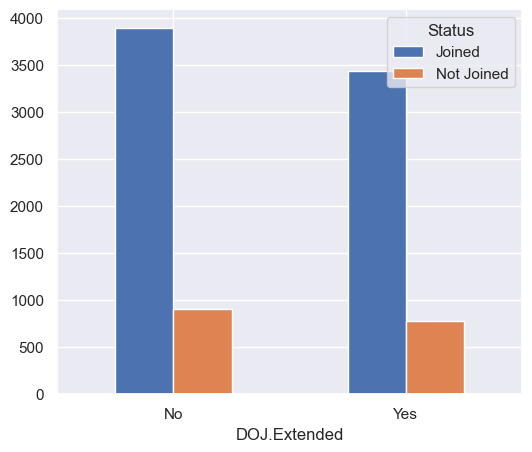

In [237]:
# Cross tabulation between "DOJ.Extended" and "Status"
CrosstabResult=pd.crosstab(index=data['DOJ.Extended'],columns=data['Status'])
print(CrosstabResult)
 
# Grouped bar chart between "DOJ.Extended" and "Status"
CrosstabResult.plot.bar(figsize=(6,5), rot=0)

In [238]:
# Checking categories and distribution of "Offered.band" feature per category
data["Offered.band"].value_counts()


E1    5578
E2    2717
E3     505
E0     211
Name: Offered.band, dtype: int64

Status        Joined  Not Joined
Offered.band                    
E0               161          50
E1              4536        1042
E2              2199         518
E3               430          75


<AxesSubplot:xlabel='Offered.band'>

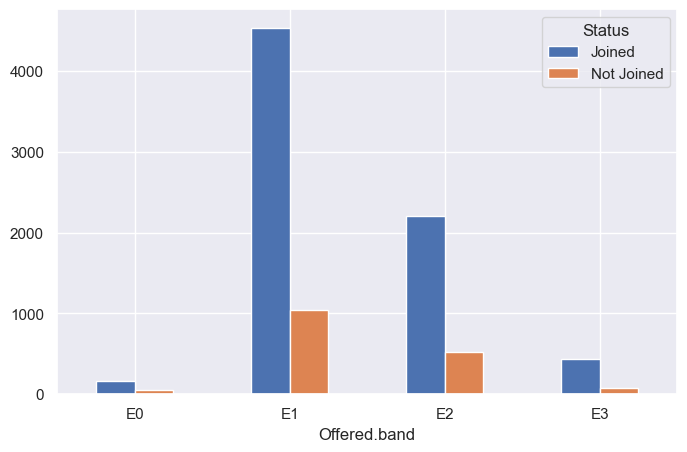

In [239]:
# Cross tabulation between "Offered.band" and "Status"
CrosstabResult=pd.crosstab(index=data['Offered.band'],columns=data['Status'])
print(CrosstabResult)
 
# Grouped bar chart between "Offered.band" and "Status"
CrosstabResult.plot.bar(figsize=(8,5), rot=0)

In [240]:
# Checking categories and distribution of "Joining.Bonus" feature per category
data["Joining.Bonus"].value_counts()


No     8593
Yes     418
Name: Joining.Bonus, dtype: int64

Status         Joined  Not Joined
Joining.Bonus                    
No               6989        1604
Yes               337          81


<AxesSubplot:xlabel='Joining.Bonus'>

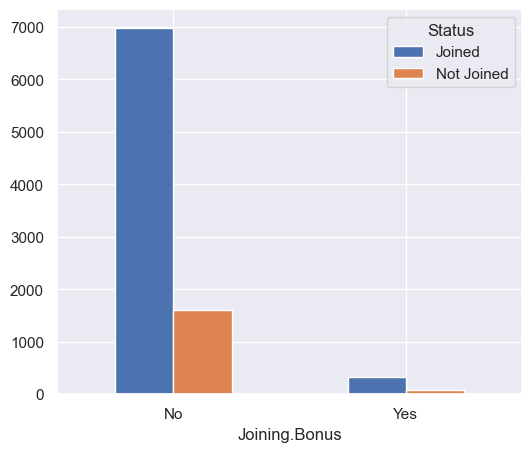

In [241]:
# Cross tabulation between "Joining.Bonus" and "Status"
CrosstabResult=pd.crosstab(index=data['Joining.Bonus'],columns=data['Status'])
print(CrosstabResult)
 
# Grouped bar chart between "Joining.Bonus" and "Status"
CrosstabResult.plot.bar(figsize=(6,5), rot=0)

In [242]:
# Checking categories and distribution of "Candidate.relocate.actual" feature per category
data["Candidate.relocate.actual"].value_counts()

No     7717
Yes    1294
Name: Candidate.relocate.actual, dtype: int64

Status                     Joined  Not Joined
Candidate.relocate.actual                    
No                           6032        1685
Yes                          1294           0


<AxesSubplot:xlabel='Candidate.relocate.actual'>

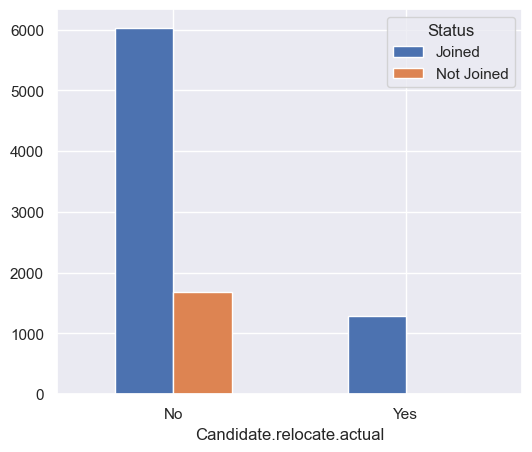

In [243]:
# Cross tabulation between "Candidate.relocate.actual" and "Status"
CrosstabResult=pd.crosstab(index=data['Candidate.relocate.actual'],columns=data['Status'])
print(CrosstabResult)
 
# Grouped bar chart between "Candidate.relocate.actual" and "Status"
CrosstabResult.plot.bar(figsize=(6,5), rot=0)

In [244]:
# Checking categories and distribution of "Gender" feature per category
data["Gender"].value_counts()


Male      7457
Female    1554
Name: Gender, dtype: int64

Status  Joined  Not Joined
Gender                    
Female    1281         273
Male      6045        1412


<AxesSubplot:xlabel='Gender'>

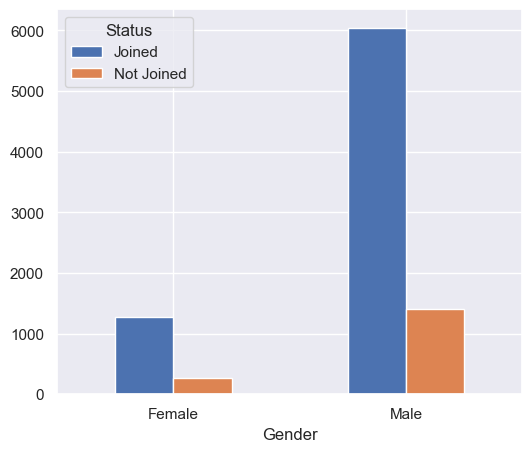

In [245]:
# Cross tabulation between "Gender" and "Status"
CrosstabResult=pd.crosstab(index=data['Gender'],columns=data['Status'])
print(CrosstabResult)
 
# Grouped bar chart between "Gender" and "Status"
CrosstabResult.plot.bar(figsize=(6,5), rot=0)

In [246]:
# Checking categories and distribution of "Candidate.Source" feature per category
data["Candidate.Source"].value_counts()


Direct               4808
Agency               2587
Employee Referral    1616
Name: Candidate.Source, dtype: int64

Status             Joined  Not Joined
Candidate.Source                     
Agency               1962         625
Direct               3942         866
Employee Referral    1422         194


<AxesSubplot:xlabel='Candidate.Source'>

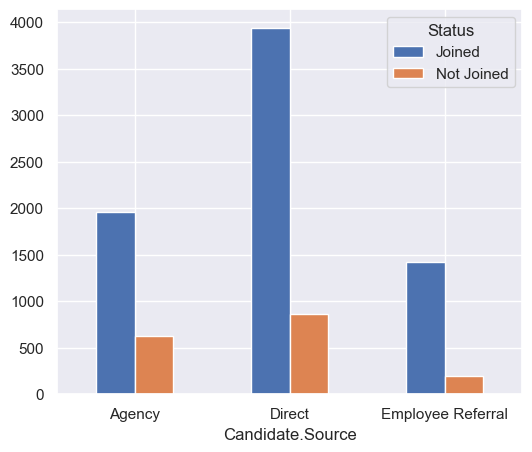

In [247]:
# Cross tabulation between "Candidate.Source" and "Status"
CrosstabResult=pd.crosstab(index=data['Candidate.Source'],columns=data['Status'])
print(CrosstabResult)
 
# Grouped bar chart between "Candidate.Source" and "Status"
CrosstabResult.plot.bar(figsize=(6,5), rot=0)

In [248]:
# Checking categories and distribution of "LOB" feature per category
data["LOB"].value_counts()


INFRA         2861
ERS           2427
BFSI          1396
ETS            691
CSMP           580
AXON           569
EAS            346
Healthcare     126
MMS             15
Name: LOB, dtype: int64

Status      Joined  Not Joined
LOB                           
AXON           440         129
BFSI          1059         337
CSMP           472         108
EAS            254          92
ERS           1895         532
ETS            574         117
Healthcare     104          22
INFRA         2513         348
MMS             15           0


<AxesSubplot:xlabel='LOB'>

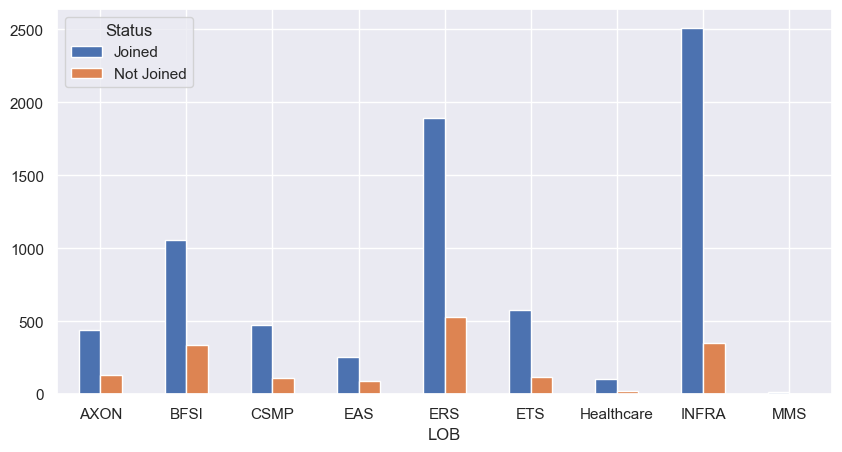

In [249]:
# Cross tabulation between "LOB" and "Status"
CrosstabResult=pd.crosstab(index=data['LOB'],columns=data['Status'])
print(CrosstabResult)
 
# Grouped bar chart between "LOB" and "Status"
CrosstabResult.plot.bar(figsize=(10,5), rot=0)

In [250]:
# Checking categories and distribution of "Location" feature per category
data["Location"].value_counts()


Chennai      3152
Noida        2735
Bangalore    2234
Hyderabad     341
Mumbai        198
Gurgaon       147
Kolkata       129
Pune           48
Others         13
Cochin          8
Ahmedabad       6
Name: Location, dtype: int64

Status     Joined  Not Joined
Location                     
Ahmedabad       5           1
Bangalore    1745         489
Chennai      2487         665
Cochin          7           1
Gurgaon       119          28
Hyderabad     266          75
Kolkata       100          29
Mumbai        177          21
Noida        2369         366
Others         13           0
Pune           38          10


<AxesSubplot:xlabel='Location'>

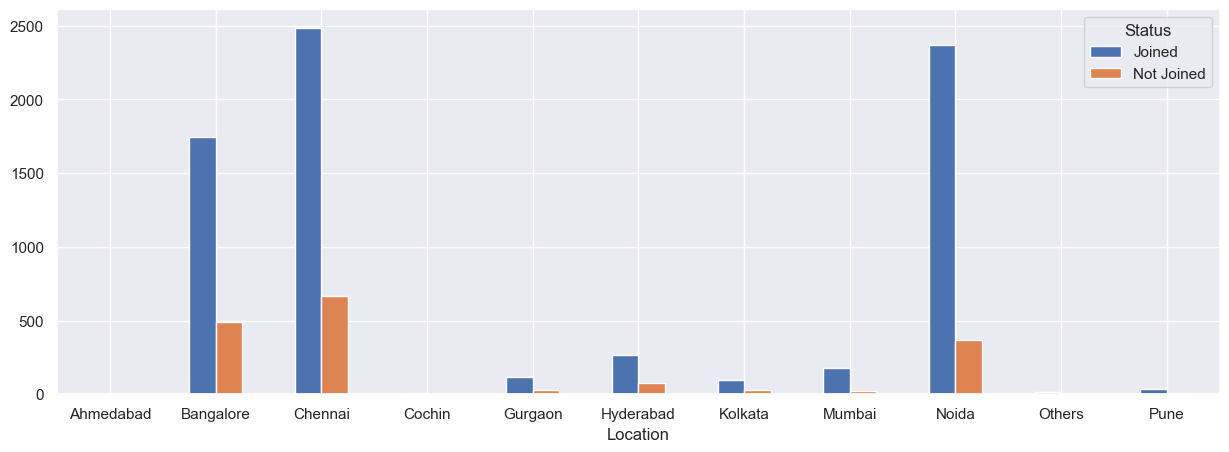

In [251]:
# Cross tabulation between "Location" and "Status"
CrosstabResult=pd.crosstab(index=data['Location'],columns=data['Status'])
print(CrosstabResult)
 
# Grouped bar chart between "Location" and "Status"
CrosstabResult.plot.bar(figsize=(15,5), rot=0)

In [252]:
# Checking categories and distribution of label "Status" per category
data["Status"].value_counts()

Joined        7326
Not Joined    1685
Name: Status, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

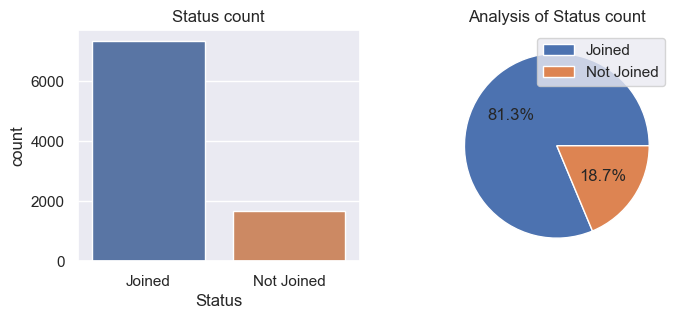

In [253]:
# Visualizing label "Status" with various ploting
lables=data["Status"].value_counts().index
values=data["Status"].value_counts().values

plt.figure(figsize=(8,3))

plt.subplot(1, 2, 1)
sns.barplot(x=lables, y=values)
plt.xlabel('Status')
plt.ylabel('count')
plt.title("Status count")

plt.subplot(1, 2, 2)
plt.pie(values,autopct="%1.1f%%")
plt.title("Analysis of Status count")
plt.legend(lables, loc='best')
plt.show



# Visualizing the data distribution of numeric attributes/labels

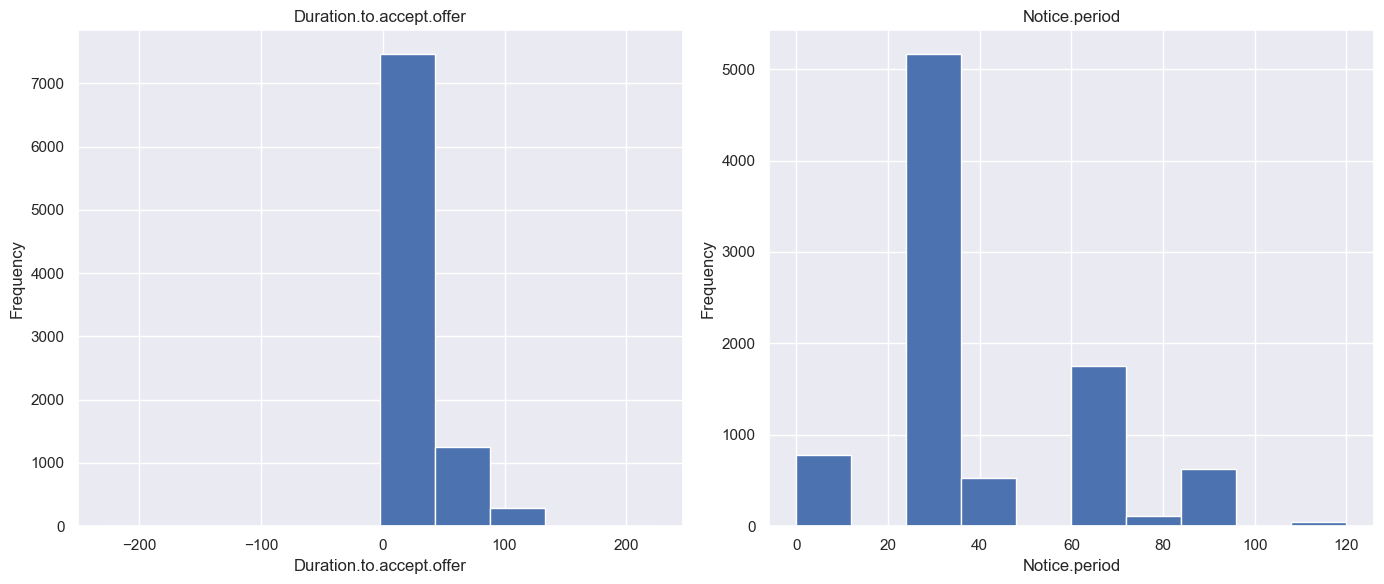

In [254]:
# This show the class distribution of "Duration.to.accept.offer", "Notice.period"
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
data["Duration.to.accept.offer"].plot(kind='hist')
plt.title("Duration.to.accept.offer")
plt.xlabel("Duration.to.accept.offer")
plt.tight_layout()

plt.subplot(1, 2, 2)
data["Notice.period"].plot(kind='hist')
plt.title("Notice.period")
plt.xlabel("Notice.period")
plt.tight_layout()


<AxesSubplot:xlabel='Notice.period', ylabel='Duration.to.accept.offer'>

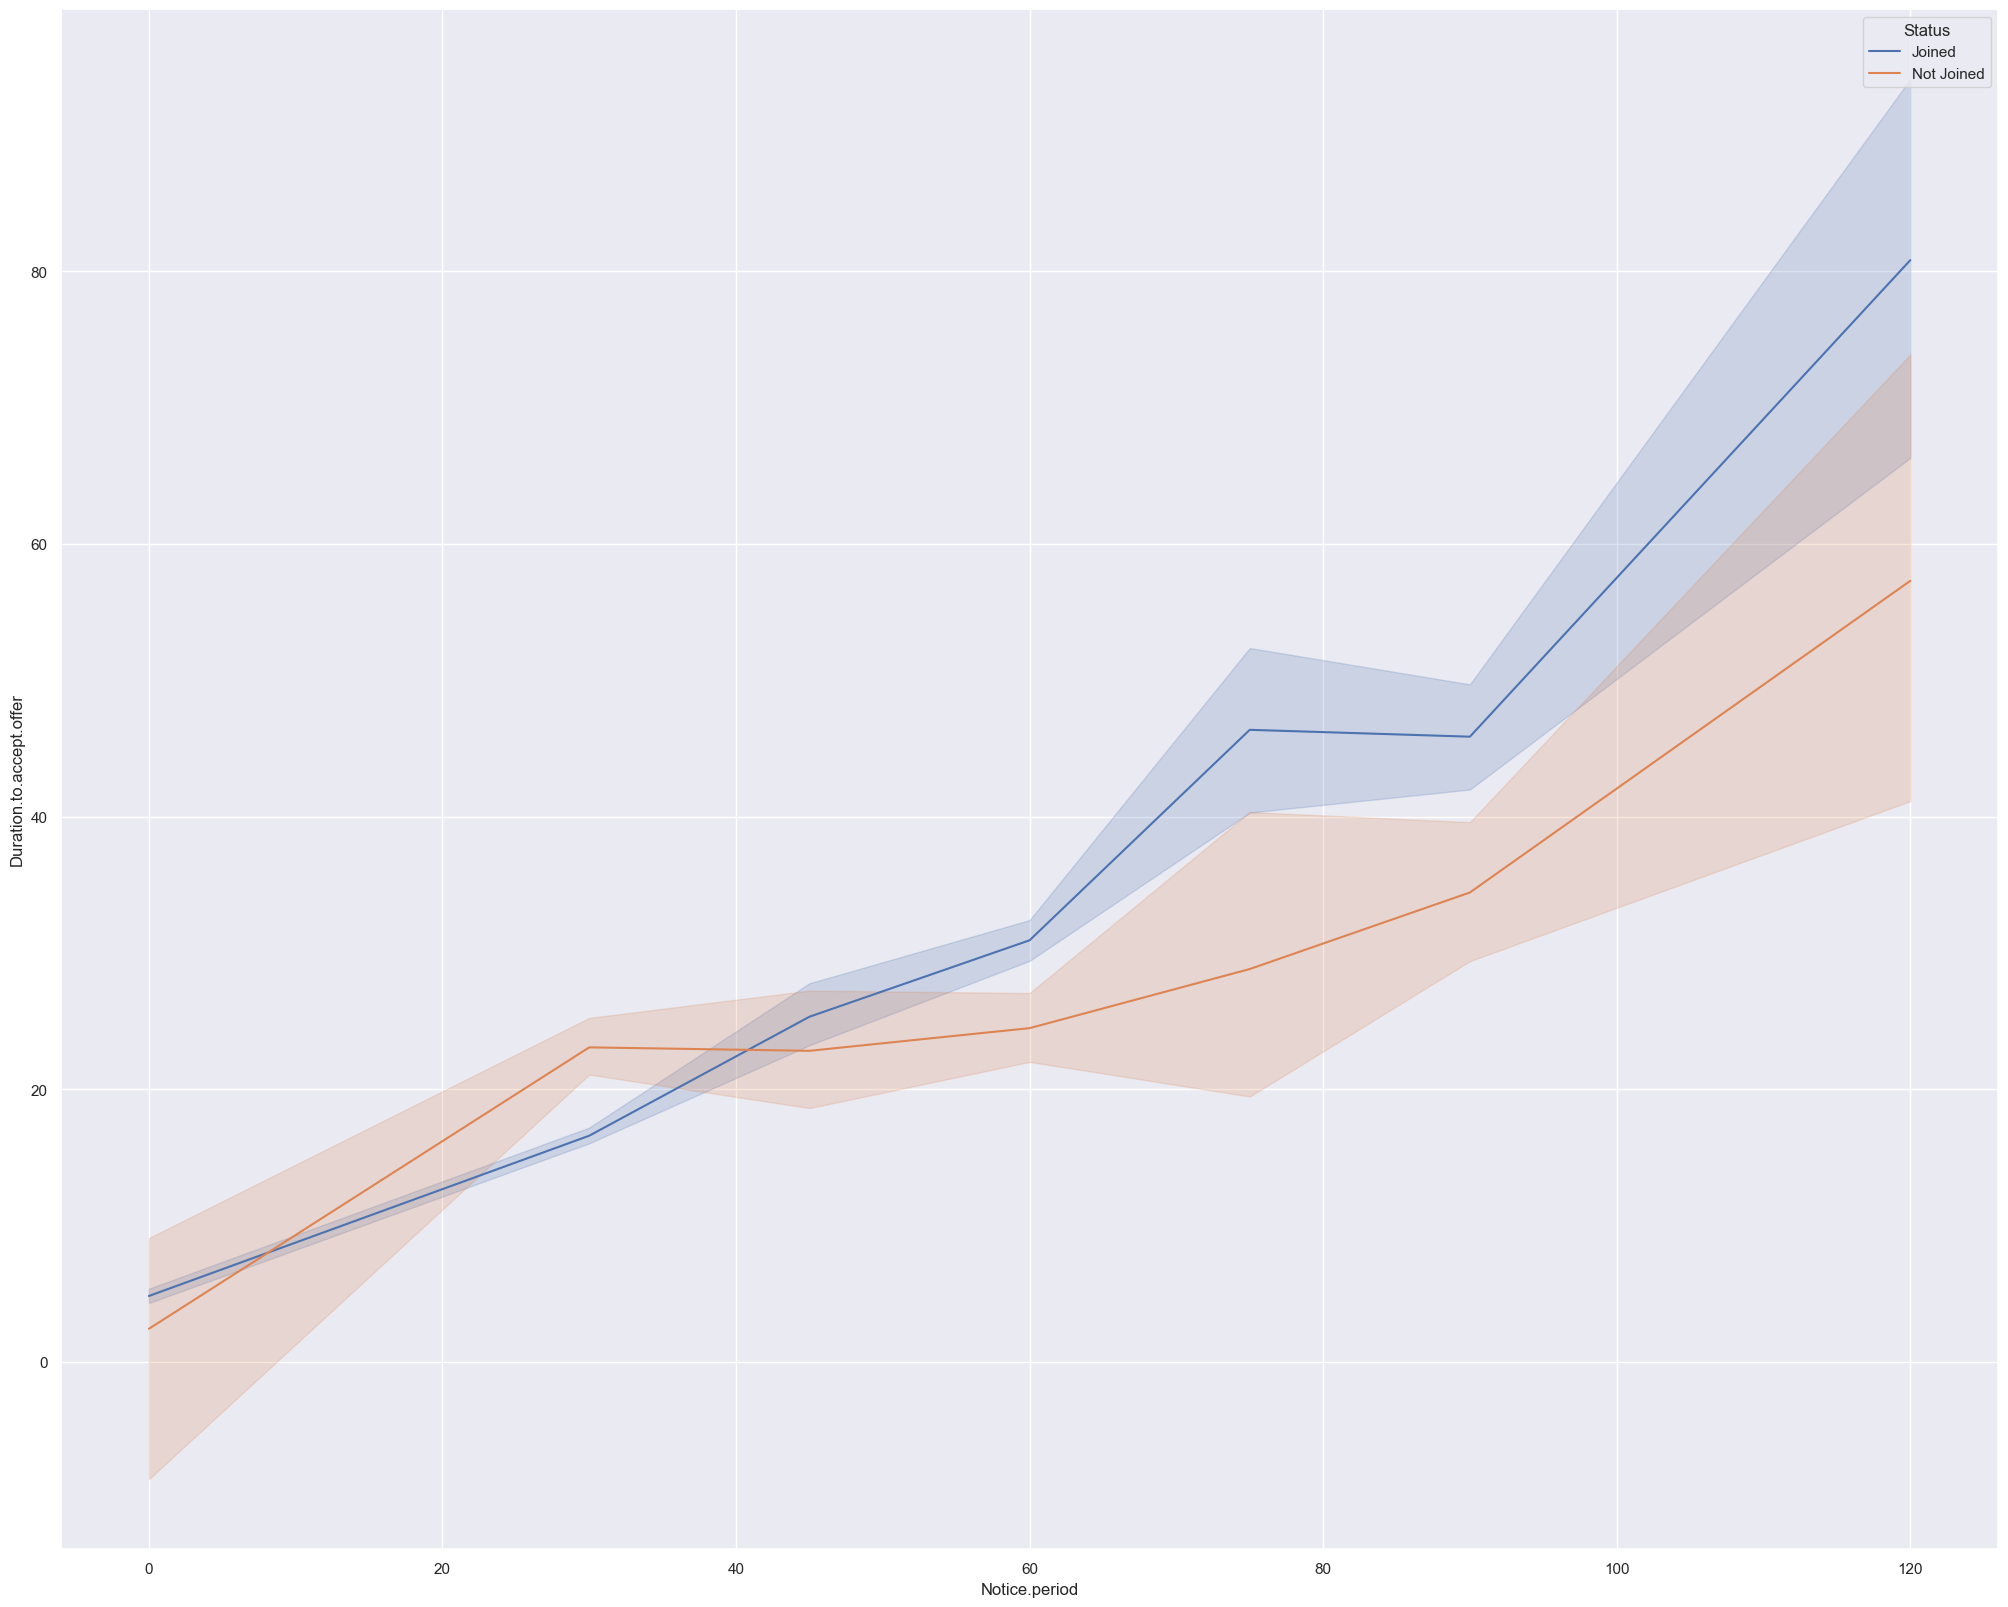

In [255]:
# impact of "Duration.to.accept.offer" and "Notice.period" on "Status" using a line plot.

# data.groupby("Status")[["Duration.to.accept.offer", "Notice.period"]].mean().T.plot(figsize=(10,5))

sns.lineplot(data=data, x="Notice.period", y="Duration.to.accept.offer", hue="Status")

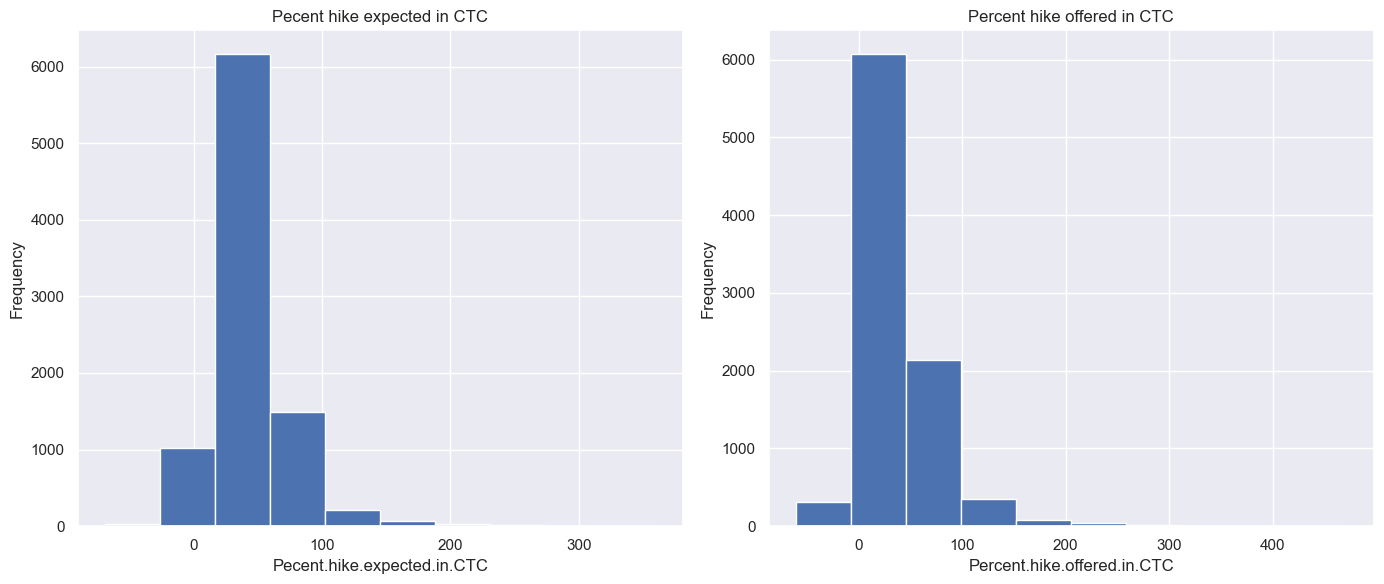

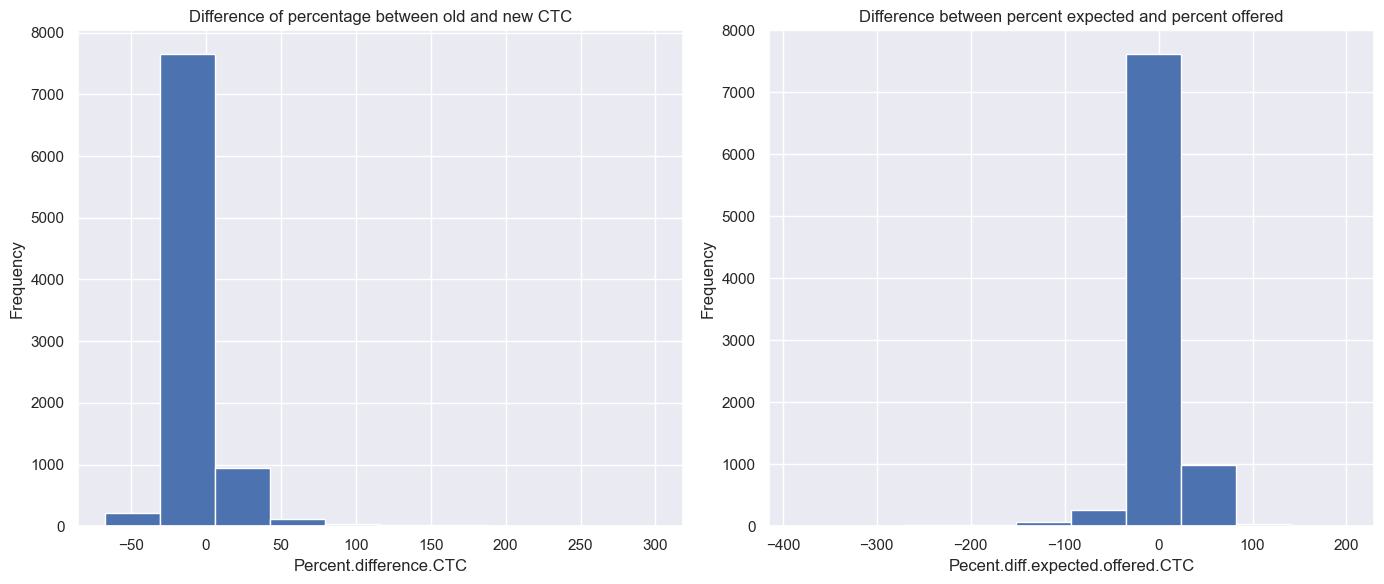

In [256]:
# This show the class distribution of "Pecent.hike.expected.in.CTC", "Percent.hike.offered.in.CTC", "Percent.difference.CTC"
# We also see the distribution of calculated data as differences between "Pecent.hike.expected.in.CTC" and
# "Percent.hike.offered.in.CTC".

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
data["Pecent.hike.expected.in.CTC"].plot(kind='hist')
plt.title("Pecent hike expected in CTC")
plt.xlabel("Pecent.hike.expected.in.CTC")
plt.tight_layout()

plt.subplot(1, 2, 2)
data["Percent.hike.offered.in.CTC"].plot(kind='hist')
plt.title("Percent hike offered in CTC")
plt.xlabel("Percent.hike.offered.in.CTC")
plt.tight_layout()

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
data["Percent.difference.CTC"].plot(kind='hist')
plt.title("Difference of percentage between old and new CTC")
plt.xlabel("Percent.difference.CTC")
plt.tight_layout()

plt.subplot(1, 2, 2)
data["Pecent.diff.expected.offered.CTC"] = data["Pecent.hike.expected.in.CTC"] - data["Percent.hike.offered.in.CTC"]
data["Pecent.diff.expected.offered.CTC"].plot(kind='hist')
plt.title("Difference between percent expected and percent offered")
plt.xlabel("Pecent.diff.expected.offered.CTC")
plt.tight_layout()

<AxesSubplot:>

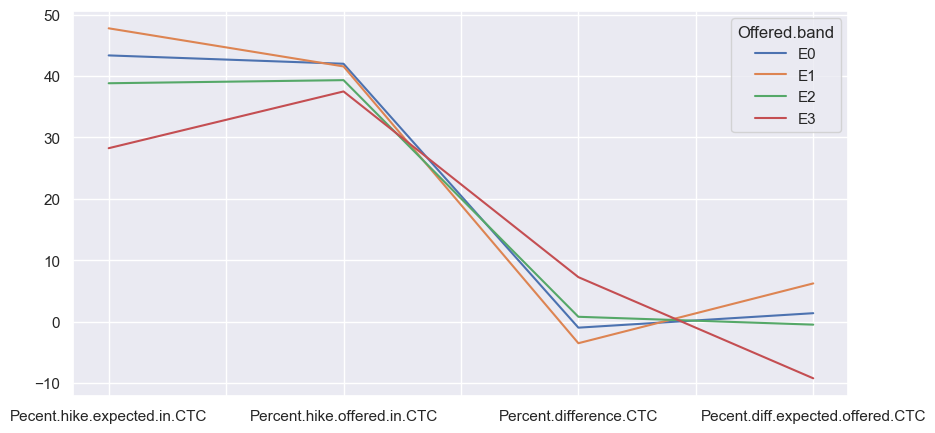

In [257]:
# impact of "Offered.band" on CTC using a line plot.

data.groupby("Offered.band")[["Pecent.hike.expected.in.CTC", "Percent.hike.offered.in.CTC", 
                              "Percent.difference.CTC", "Pecent.diff.expected.offered.CTC"]].mean().T.plot(figsize=(10,5))

<AxesSubplot:>

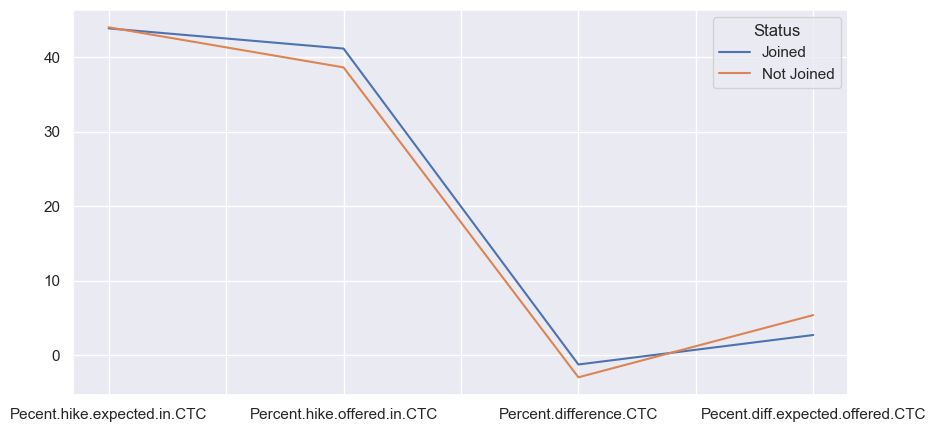

In [258]:
# impact of CTC on "Status" using a line plot.

data.groupby("Status")[["Pecent.hike.expected.in.CTC", "Percent.hike.offered.in.CTC", 
                              "Percent.difference.CTC", "Pecent.diff.expected.offered.CTC"]].mean().T.plot(figsize=(10,5))

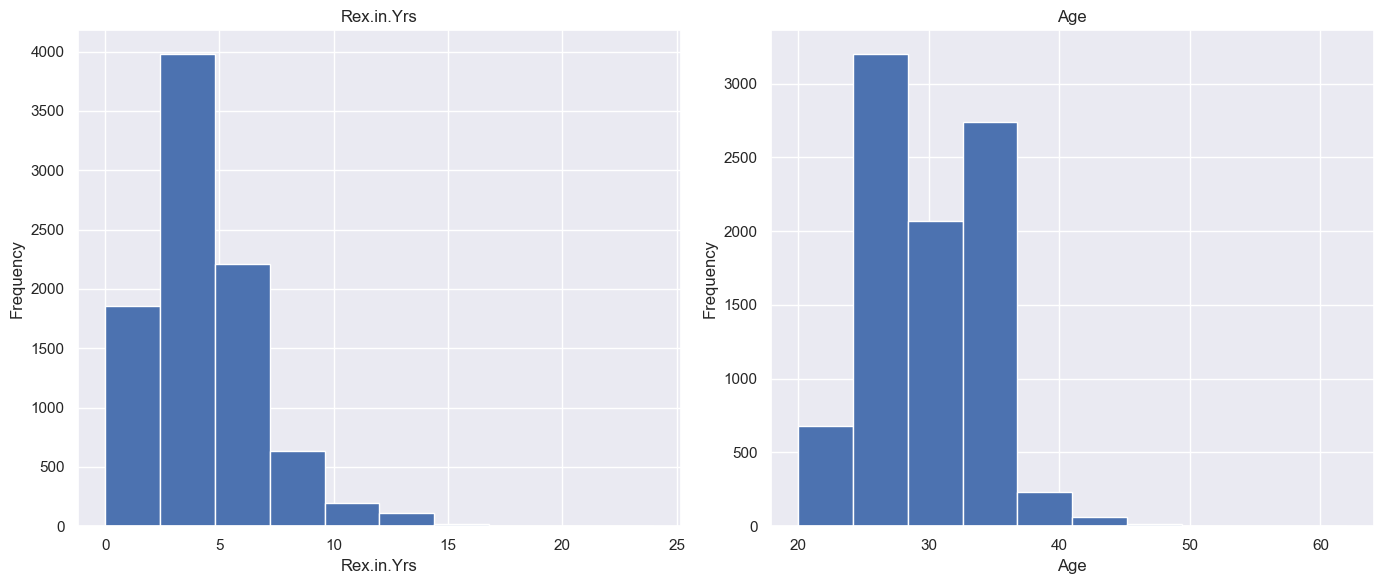

In [259]:
# This show the class distribution of "Rex.in.Yrs", "Age"
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
data["Rex.in.Yrs"].plot(kind='hist')
plt.title("Rex.in.Yrs")
plt.xlabel("Rex.in.Yrs")
plt.tight_layout()

plt.subplot(1, 2, 2)
data["Age"].plot(kind='hist')
plt.title("Age")
plt.xlabel("Age")
plt.tight_layout()

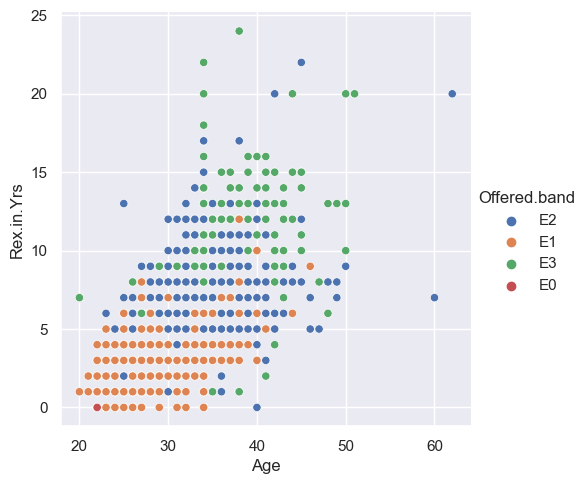

In [260]:
# Age vs Rex.in.Yrs
sns.relplot(x='Age', y='Rex.in.Yrs', hue='Offered.band', data=data)

<AxesSubplot:xlabel='Age', ylabel='Rex.in.Yrs'>

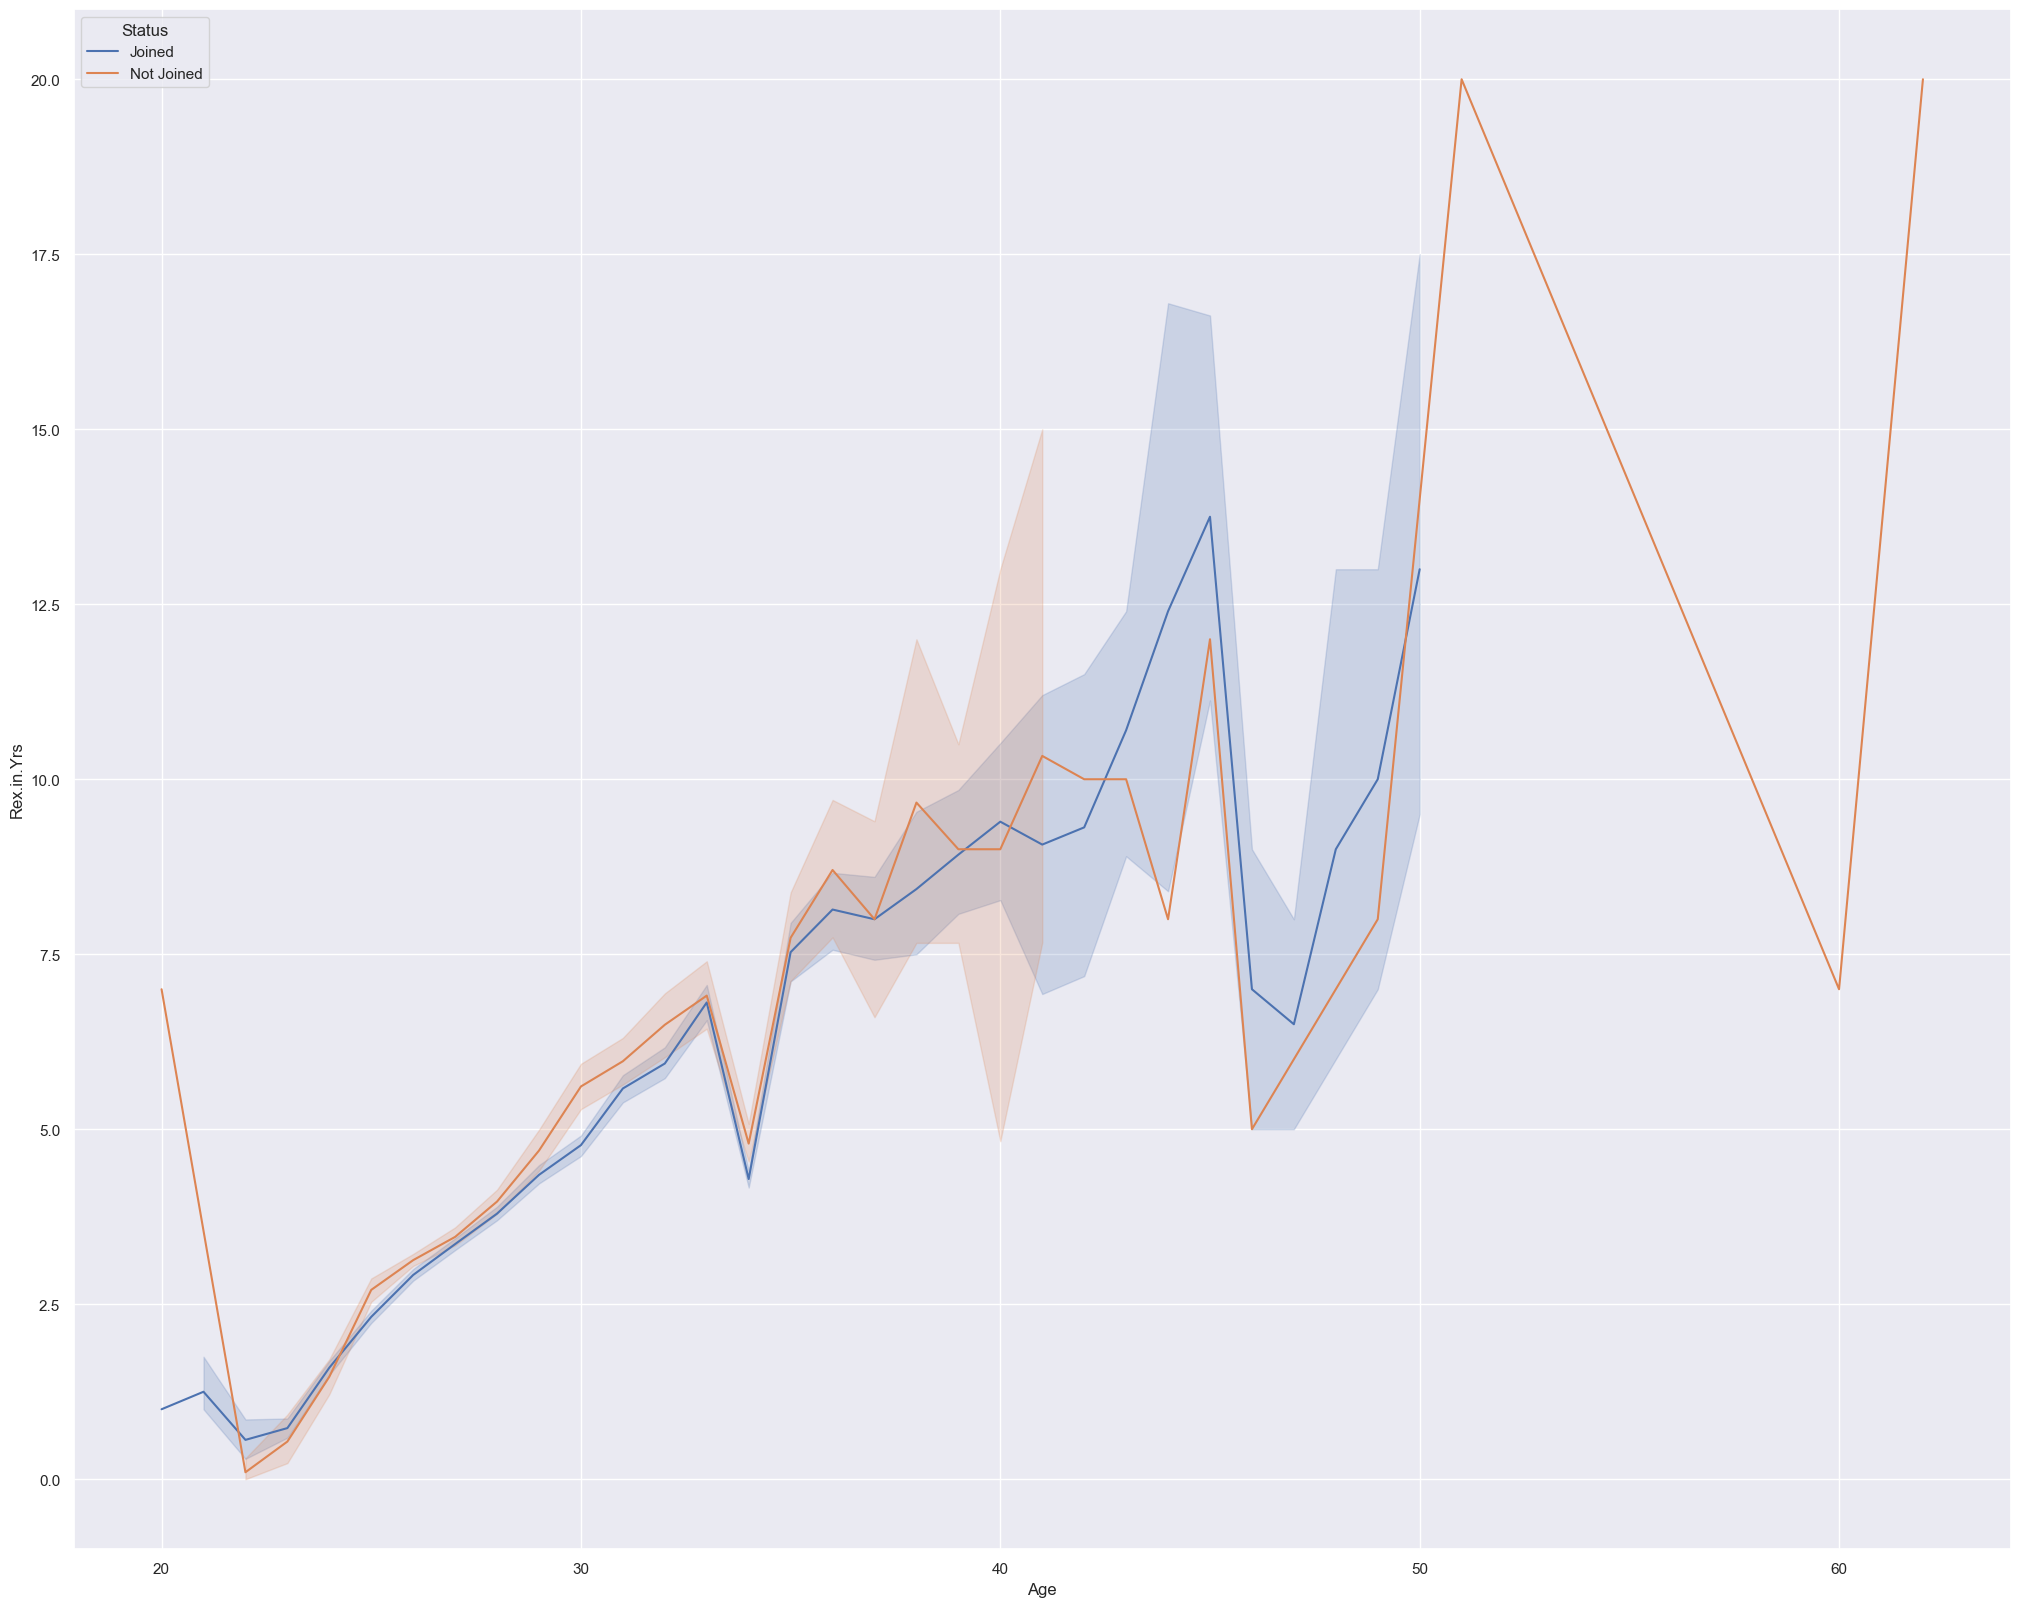

In [261]:
# impact of "Age" and "Rex.in.Yrs" on "Status" using a line plot.

# data.groupby("Status")[["Age", "Rex.in.Yrs"]].mean().T.plot(figsize=(10,5))
sns.lineplot(data=data, x="Age", y="Rex.in.Yrs", hue="Status")

# Describing all the numeric columns of the dataset

In [262]:
data.describe()

,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Rex.in.Yrs,Age,Pecent.diff.expected.offered.CTC
count,9011.000000,9011.000000,9011.000000,9011.000000,9011.000000,9011.000000,9011.000000,9011.000000
mean,21.369437,39.278659,43.861520,40.656652,-1.569059,4.239929,29.916879,3.204868
std,25.938301,22.230658,29.860747,36.084426,19.608174,2.552387,4.116165,27.422449
min,-228.000000,0.000000,-68.830000,-60.530000,-67.270000,0.000000,20.000000,-385.720000
25%,3.000000,30.000000,27.270000,22.080000,-8.330000,3.000000,27.000000,0.000000
50%,10.000000,30.000000,40.000000,36.000000,0.000000,4.000000,29.000000,0.000000
75%,33.000000,60.000000,53.850000,50.000000,0.000000,6.000000,34.000000,12.730000
max,224.000000,120.000000,359.770000,471.430000,300.000000,24.000000,62.000000,200.000000


# Cleaning up data

In [263]:
# Checking the number of instances with -ve "Duration.to.accept.offer" value

#print(data[data['Duration.to.accept.offer'] < 0])
print(data[['Duration.to.accept.offer']][data['Duration.to.accept.offer'] < 0])

count = len(data[data["Duration.to.accept.offer"] < 0])
print("The number of rows having -ve value for feature Duration.to.accept.offer : " + str(count))

      Duration.to.accept.offer
43                          -1
235                         -1
671                         -1
971                         -1
1104                        -1
1315                        -1
1515                        -1
1517                        -1
1532                      -228
3787                        -1
4244                        -1
4790                        -1
5141                        -1
7310                        -1
7971                        -1
8593                        -1
The number of rows having -ve value for feature Duration.to.accept.offer : 16


In [264]:
# Dropping instances with -ve "Duration.to.accept.offer" value

data.drop(data[data['Duration.to.accept.offer'] < 0].index, inplace = True)
data.shape

#mean = data["Duration.to.accept.offer"].mean()
#mean_duration = round(mean)
#data.loc[data["Duration.to.accept.offer"] < 0, "Duration.to.accept.offer"] = mean_duration
#data.loc[[43, 1532, 8593]]


(8995, 17)

# Cleaning up data - Handling Outliers

<AxesSubplot:>

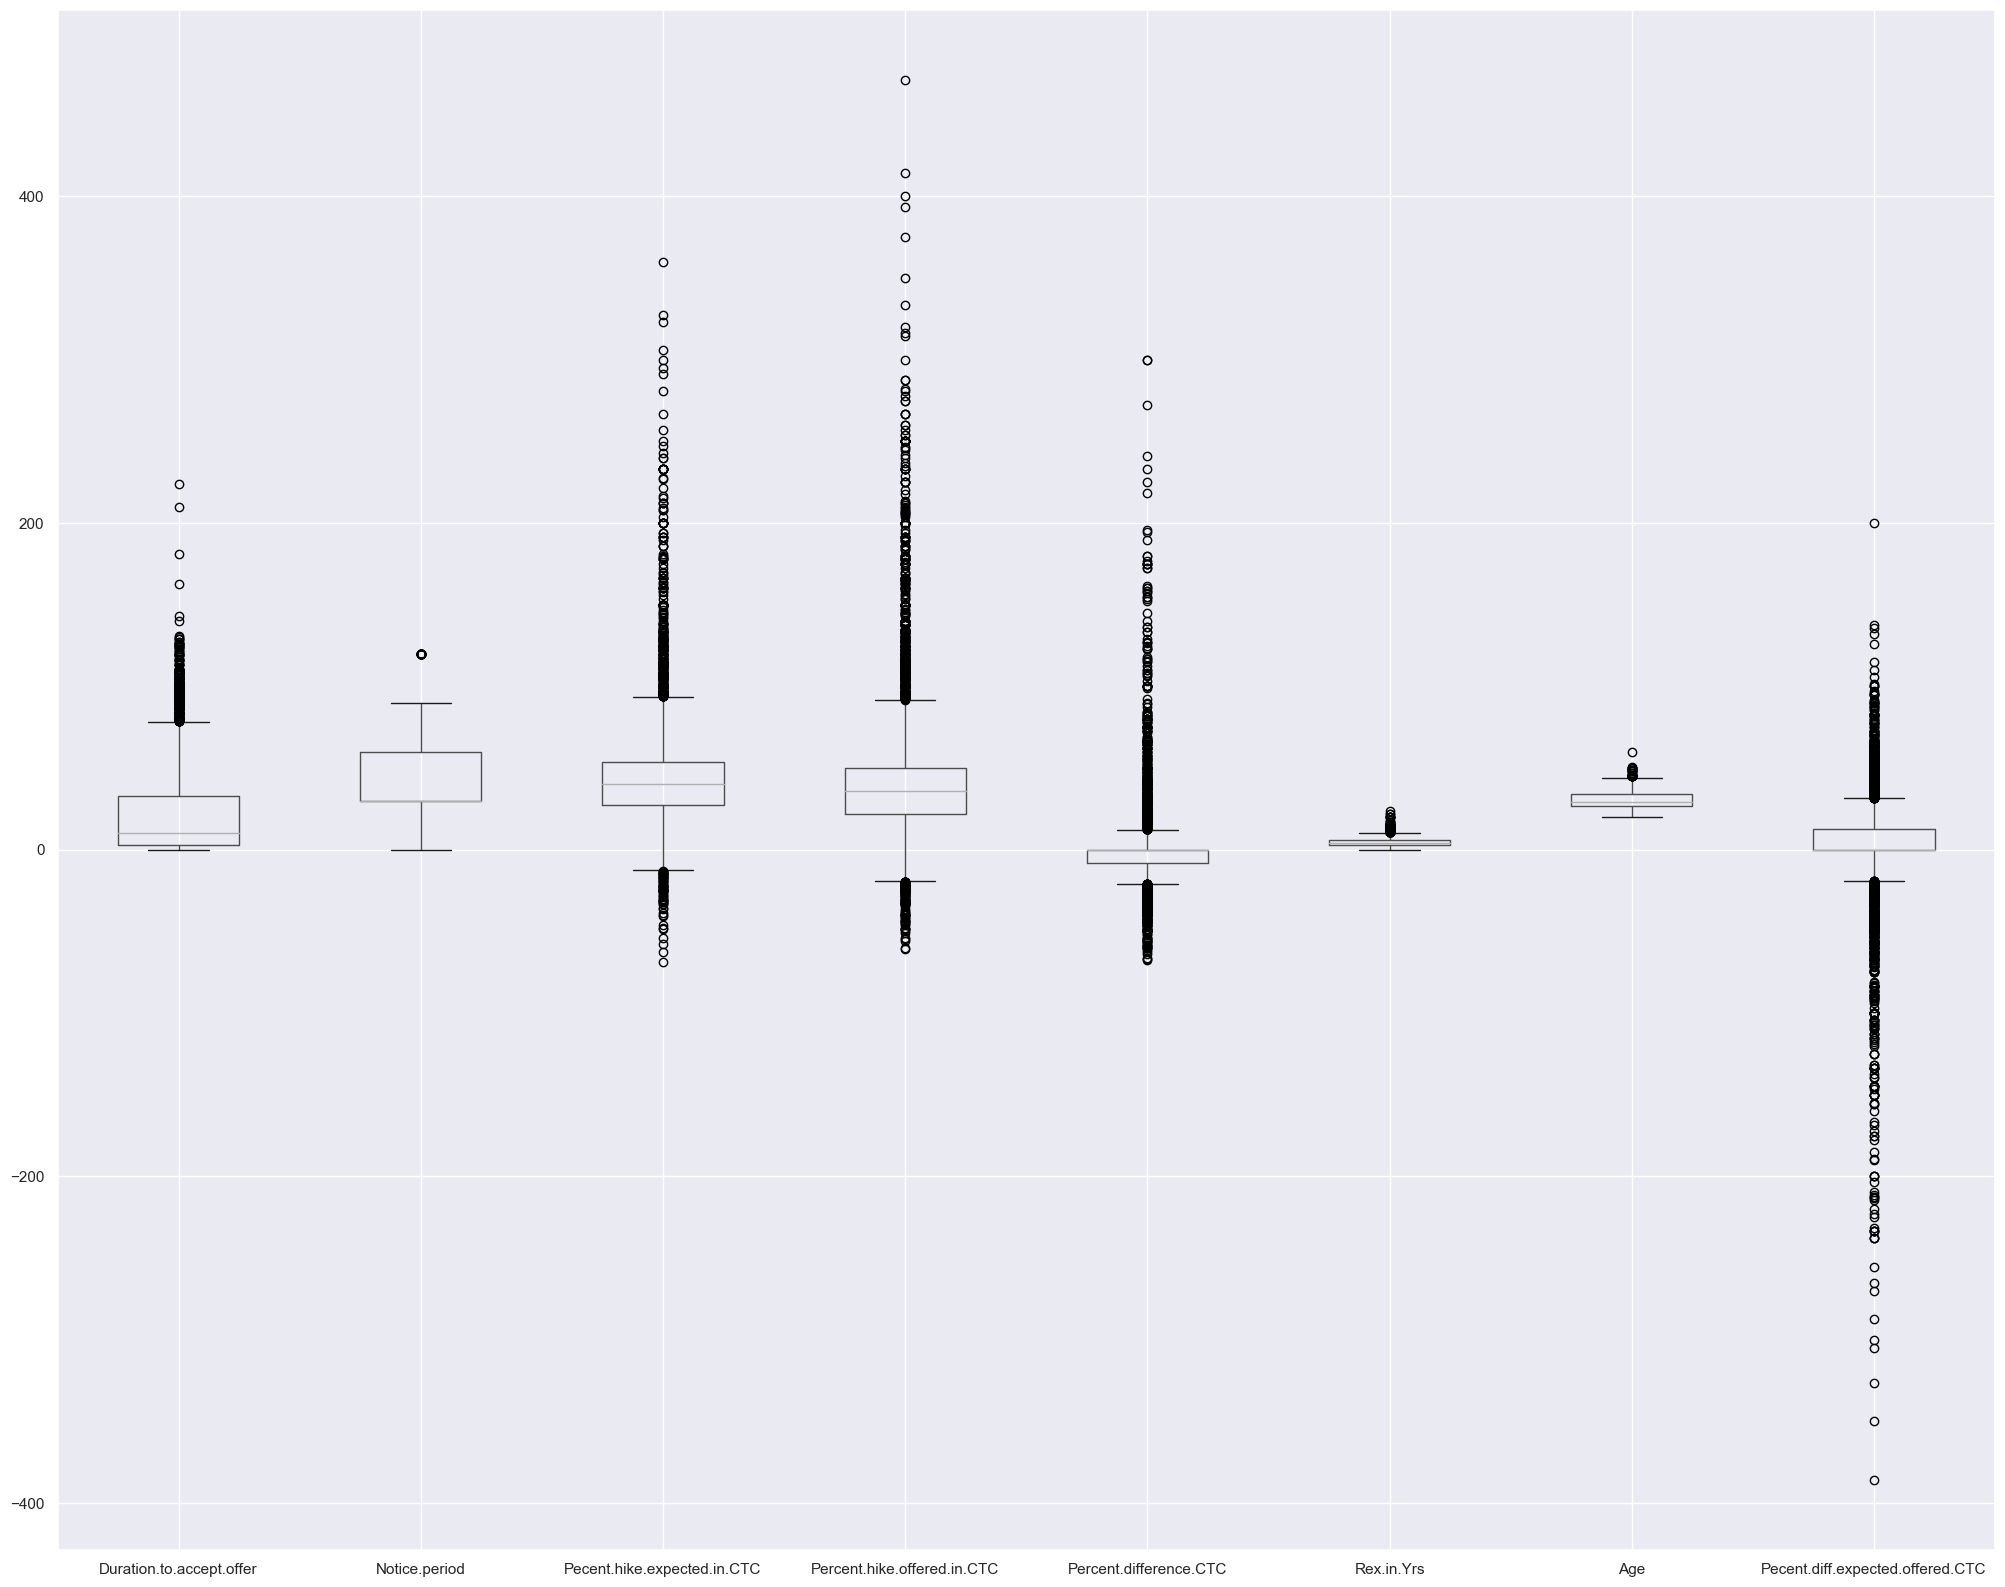

In [265]:
# Checking the numeric columns for the outliers with the help of boxplot
sns.set(rc = {'figure.figsize':(25,20)})
data.boxplot()


# Converting categorical feature to Numeric values

In [266]:
# Replace DOJ.Extended: No : 0, Yes : 1
# Replace Offered.band: E0 : 0, E1 : 1, E2 : 2, E3 : 3
# Replace Joining.Bonus: No : 0, Yes : 1
# Replace Candidate.relocate.actual: No : 0, Yes : 1
# Replace Gender: Female : 0, Male : 1
# Replace Status: Not Joined : 0, Joined : 1

data.replace({'DOJ.Extended':{'No':0, 'Yes':1}}, inplace=True)
data.replace({'Offered.band':{'E0':0, 'E1':1, 'E2':2, 'E3':3}}, inplace=True)
data.replace({'Joining.Bonus':{'No':0, 'Yes':1}}, inplace=True)
data.replace({'Candidate.relocate.actual':{'No':0, 'Yes':1}}, inplace=True)
data.replace({'Gender':{'Female':0, 'Male':1}}, inplace=True)
data.replace({'Status':{'Not Joined':0, 'Joined':1}}, inplace=True)

data.head(10)


,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status,Pecent.diff.expected.offered.CTC
0,1,14,30,2,-20.79,13.16,42.86,0,0,0,Agency,7,ERS,Noida,34,1,-33.95
1,0,18,30,2,50.00,320.00,180.00,0,0,1,Employee Referral,8,INFRA,Chennai,34,1,-270.00
2,0,3,45,2,42.84,42.84,0.00,0,0,1,Agency,4,INFRA,Noida,27,1,0.00
3,0,26,30,2,42.84,42.84,0.00,0,0,1,Employee Referral,4,INFRA,Noida,34,1,0.00
4,1,1,120,2,42.59,42.59,0.00,0,1,1,Employee Referral,6,INFRA,Noida,34,1,0.00
5,1,17,30,1,42.83,42.83,0.00,0,0,1,Employee Referral,2,INFRA,Noida,34,1,0.00
6,1,37,30,2,31.58,31.58,0.00,0,0,1,Employee Referral,7,INFRA,Noida,32,1,0.00
7,1,16,0,1,-20.00,-20.00,0.00,0,0,0,Direct,8,Healthcare,Noida,34,1,0.00
8,0,1,30,1,-22.22,-22.22,0.00,0,0,0,Employee Referral,3,BFSI,Gurgaon,26,1,0.00
9,0,6,30,1,240.00,220.00,-5.88,0,0,1,Employee Referral,3,CSMP,Chennai,34,1,20.00


In [267]:
# One-Hot Encoding of Categorical Columns 'Candidate.Source', 'LOB' and 'Location' Using Pandas library

one_hot_encoded_data = pd.get_dummies(data, columns = ['Candidate.Source', 'LOB', 'Location'])
one_hot_encoded_data.head()
#one_hot_encoded_data.shape


,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,...,Location_Bangalore,Location_Chennai,Location_Cochin,Location_Gurgaon,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Noida,Location_Others,Location_Pune
0,1,14,30,2,-20.79,13.16,42.86,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,18,30,2,50.00,320.00,180.00,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,0,3,45,2,42.84,42.84,0.00,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,26,30,2,42.84,42.84,0.00,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,1,1,120,2,42.59,42.59,0.00,0,1,1,...,0,0,0,0,0,0,0,1,0,0


# Correlation analysis

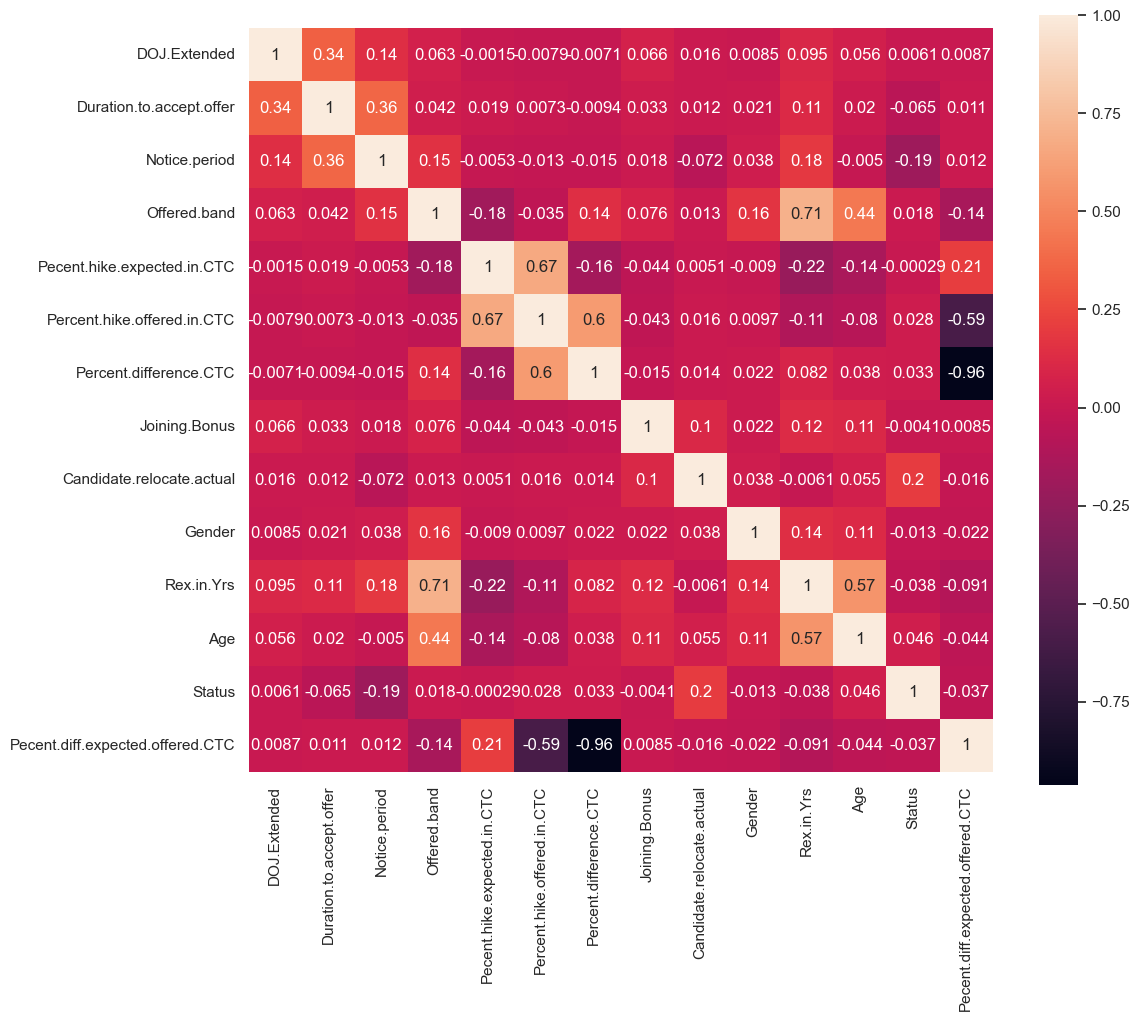

In [268]:
# Corelation analysis for every possible combination of columns using heatmap
fig=plt.figure(figsize=(12,10))
corr = data.corr()
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

# Segregating Features and Label

In [269]:
# Separating features (X) and labels(Y)

X = one_hot_encoded_data.drop(columns=['Status'])
Y = one_hot_encoded_data['Status']


In [270]:
# Printing sample features
X.head()

,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,...,Location_Bangalore,Location_Chennai,Location_Cochin,Location_Gurgaon,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Noida,Location_Others,Location_Pune
0,1,14,30,2,-20.79,13.16,42.86,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,18,30,2,50.00,320.00,180.00,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,0,3,45,2,42.84,42.84,0.00,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,26,30,2,42.84,42.84,0.00,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,1,1,120,2,42.59,42.59,0.00,0,1,1,...,0,0,0,0,0,0,0,1,0,0


In [271]:
# Printing sample labels
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Status, dtype: int64

# Preprocessing - Dropping unnecessary/redundant features

In [272]:
# Droppiing Features analysed during Visualization
X = X.drop(columns=['DOJ.Extended', 'Joining.Bonus', 'Gender'])

# Droppiing Features discussed during Correlation analysis
X = X.drop(columns=['Pecent.diff.expected.offered.CTC', 'Offered.band'])

X.head()

,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Candidate.relocate.actual,Rex.in.Yrs,Age,Candidate.Source_Agency,Candidate.Source_Direct,...,Location_Bangalore,Location_Chennai,Location_Cochin,Location_Gurgaon,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Noida,Location_Others,Location_Pune
0,14,30,-20.79,13.16,42.86,0,7,34,1,0,...,0,0,0,0,0,0,0,1,0,0
1,18,30,50.00,320.00,180.00,0,8,34,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,45,42.84,42.84,0.00,0,4,27,1,0,...,0,0,0,0,0,0,0,1,0,0
3,26,30,42.84,42.84,0.00,0,4,34,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,120,42.59,42.59,0.00,1,6,34,0,0,...,0,0,0,0,0,0,0,1,0,0


# Preprocessing - Feature Scaling

In [273]:
sc = StandardScaler()

X = sc.fit_transform(X)


# Building the Logistic Regression Model

In [274]:
# Splitting X and Y into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=10)

print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(6296, 31) (6296,) (2699, 31) (2699,)


In [275]:
lr = LogisticRegression(random_state=10)
         
# fit the model to the training data
lr.fit(X_train, Y_train)
print("Training Acc for the 70% Training Set is : ",lr.score(X_train,Y_train))

Training Acc for the 70% Training Set is :  0.8190914866581956


In [276]:
# make predictions on the testing set
Y_pred = lr.predict(X_test)
test_acc = accuracy_score(Y_test, Y_pred)
print("The Accuracy for 30% Test Set is: ", test_acc)

The Accuracy for 30% Test Set is:  0.807336050389033


# Evaluating Regression Model

Text(0.5, 11.249999999999995, 'Predicted Values')

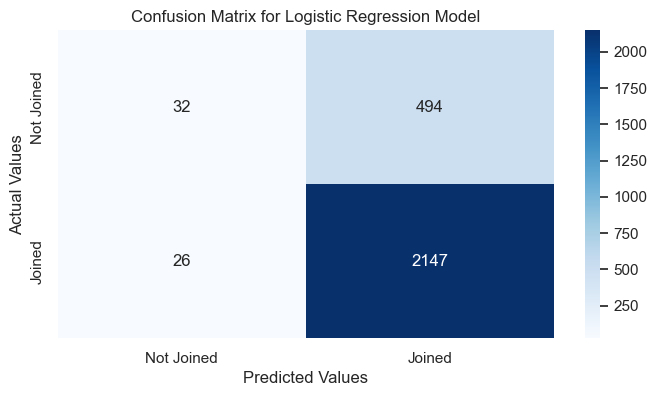

In [277]:
# Creating the confusion matrix
cm = metrics.confusion_matrix(Y_test, Y_pred)


# Assigning columns names
cm_df = pd.DataFrame(cm, 
            columns = ['Not Joined', 'Joined'],
            index = ['Not Joined', 'Joined'])
# Showing the confusion matrix
#cm_df

plt.figure(figsize=(8,4))
plt.title("Confusion Matrix for Logistic Regression Model")
sns.heatmap(cm_df, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

In [278]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

print('Performance Metrices for Logistic Regression Model : \n')
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

# calculate mis-classification
conf_misclassification = 1- conf_accuracy

# calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))

# calculate the specificity
conf_specificity = (TN / float(TN + FP))

# calculate precision
conf_precision = (TN / float(TN + FP))

# calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))

print('-'*50)
print(f'Accuracy: {round(conf_accuracy,2)}') 
print(f'Mis-Classification: {round(conf_misclassification,2)}') 
print(f'Sensitivity: {round(conf_sensitivity,2)}') 
print(f'Specificity: {round(conf_specificity,2)}') 
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')

Performance Metrices for Logistic Regression Model : 

True Positives: 2147
True Negatives: 32
False Positives: 494
False Negatives: 26
--------------------------------------------------
Accuracy: 0.81
Mis-Classification: 0.19
Sensitivity: 0.99
Specificity: 0.06
Precision: 0.06
f_1 Score: 0.11


# Interpreting sensitivity, specificity and model accuracy

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.805113     1.000000     0.000000
0.1          0.1  0.805113     1.000000     0.000000
0.2          0.2  0.805113     1.000000     0.000000
0.3          0.3  0.805113     1.000000     0.000000
0.4          0.4  0.804742     0.998159     0.005703
0.5          0.5  0.807336     0.988035     0.060837
0.6          0.6  0.801778     0.966406     0.121673
0.7          0.7  0.785476     0.898297     0.319392
0.8          0.8  0.656910     0.653935     0.669202
0.9          0.9  0.430530     0.304188     0.952471


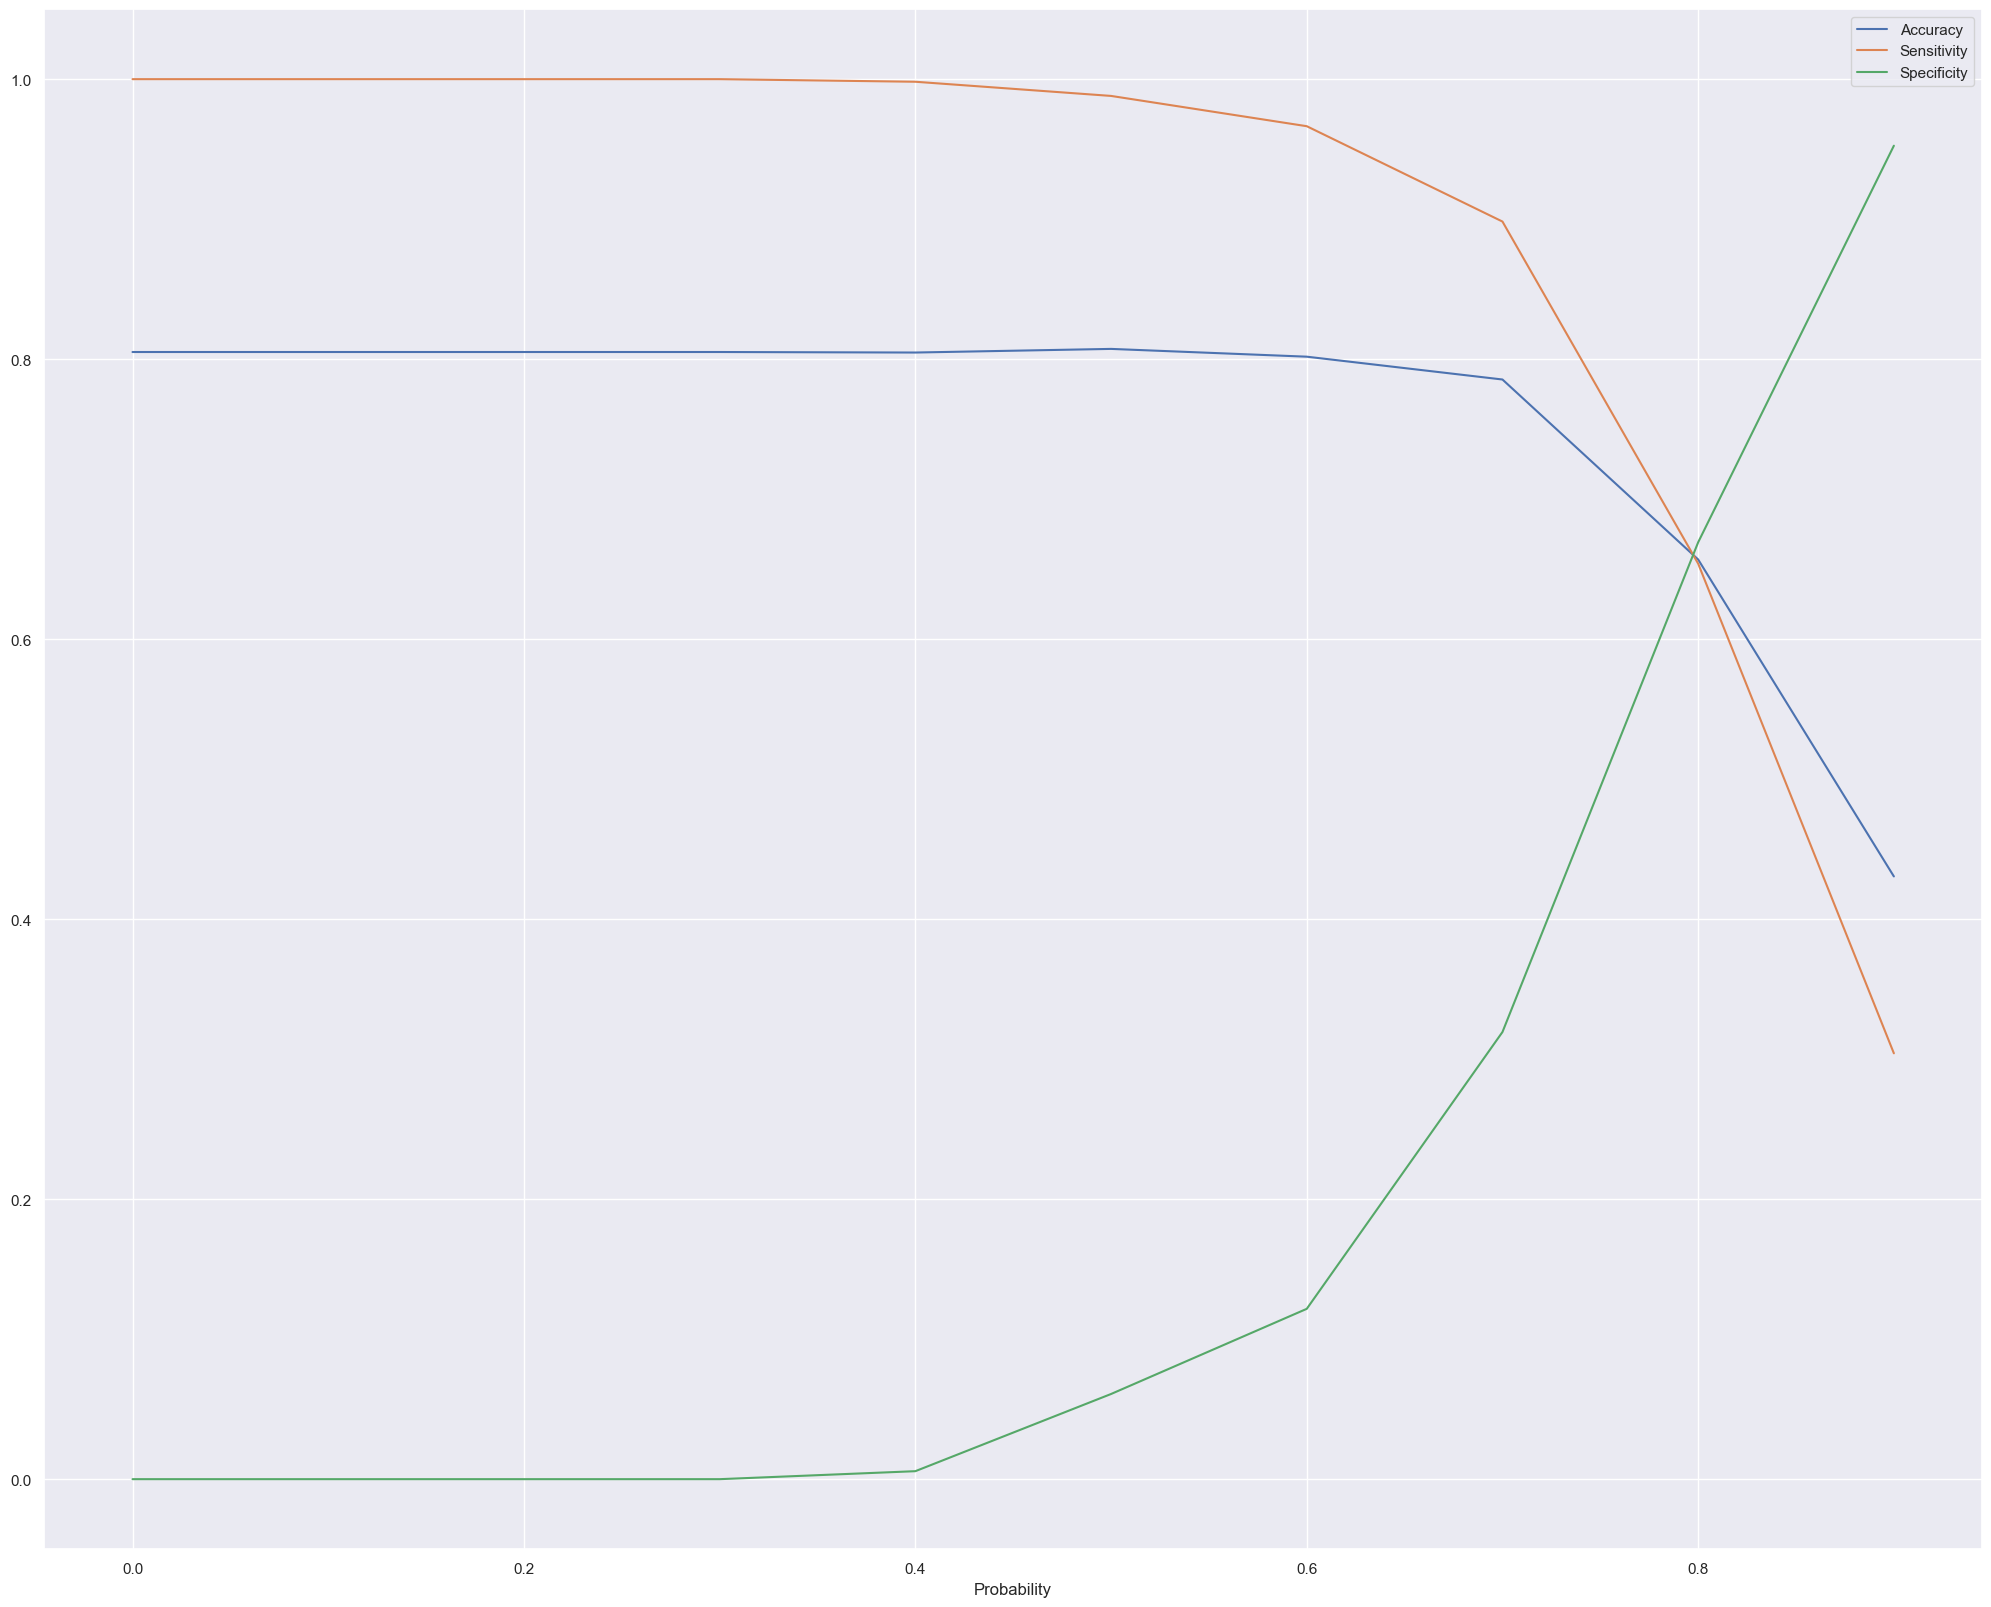

In [279]:
# Finding optimum cutoff for the Logistic Regression model

cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    THRESHOLD = i
    Y_pred = np.where(lr.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
    cm = metrics.confusion_matrix(Y_test, Y_pred)
    #print("For THRESHOLD : ", i, ", The Confution Matrix - ")
    #print(cm)
    total=sum(sum(cm))
    Accuracy = (cm[0,0]+cm[1,1])/total
    Sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    Specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    cutoff_df.loc[i] =[ i ,Accuracy,Sensitivity,Specificity]

print(cutoff_df.head(10))  
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

# Other classifier chosen: Ensemble Classifier - Bagging

In [280]:
# Bagging Model 

bg = BaggingClassifier(DecisionTreeClassifier(), max_samples= 0.5, max_features = 1.0, n_estimators = 20)
bg.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5,
                  n_estimators=20)

In [281]:
bg.score(X_train,Y_train)

0.9488564167725541

In [282]:
bg.score(X_test,Y_test)

0.807336050389033

In [283]:
Y_pred = bg.predict(X_test)

Text(0.5, 11.249999999999995, 'Predicted Values')

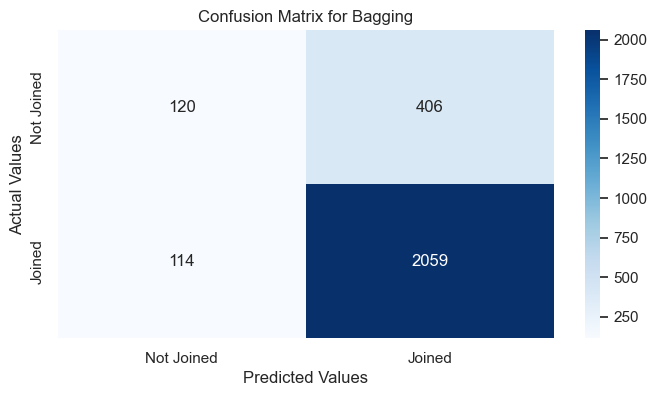

In [284]:
# Creating the confusion matrix
cm = metrics.confusion_matrix(Y_test, Y_pred)

# Assigning columns names
cm_df = pd.DataFrame(cm, 
            columns = ['Not Joined', 'Joined'],
            index = ['Not Joined', 'Joined'])
# Showing the confusion matrix
#cm_df

plt.figure(figsize=(8,4))
plt.title("Confusion Matrix for Bagging")
sns.heatmap(cm_df, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

In [285]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

print('Performance Metrices for Bagging Model : \n')
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

# calculate mis-classification
conf_misclassification = 1- conf_accuracy

# calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))

# calculate the specificity
conf_specificity = (TN / float(TN + FP))

# calculate precision
conf_precision = (TN / float(TN + FP))

# calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))

print('-'*50)
print(f'Accuracy: {round(conf_accuracy,2)}') 
print(f'Mis-Classification: {round(conf_misclassification,2)}') 
print(f'Sensitivity: {round(conf_sensitivity,2)}') 
print(f'Specificity: {round(conf_specificity,2)}') 
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')

Performance Metrices for Bagging Model : 

True Positives: 2059
True Negatives: 120
False Positives: 406
False Negatives: 114
--------------------------------------------------
Accuracy: 0.81
Mis-Classification: 0.19
Sensitivity: 0.95
Specificity: 0.23
Precision: 0.23
f_1 Score: 0.37


## Compare the performance of Logistic Regression and Bagging

## ROC AUC comparison

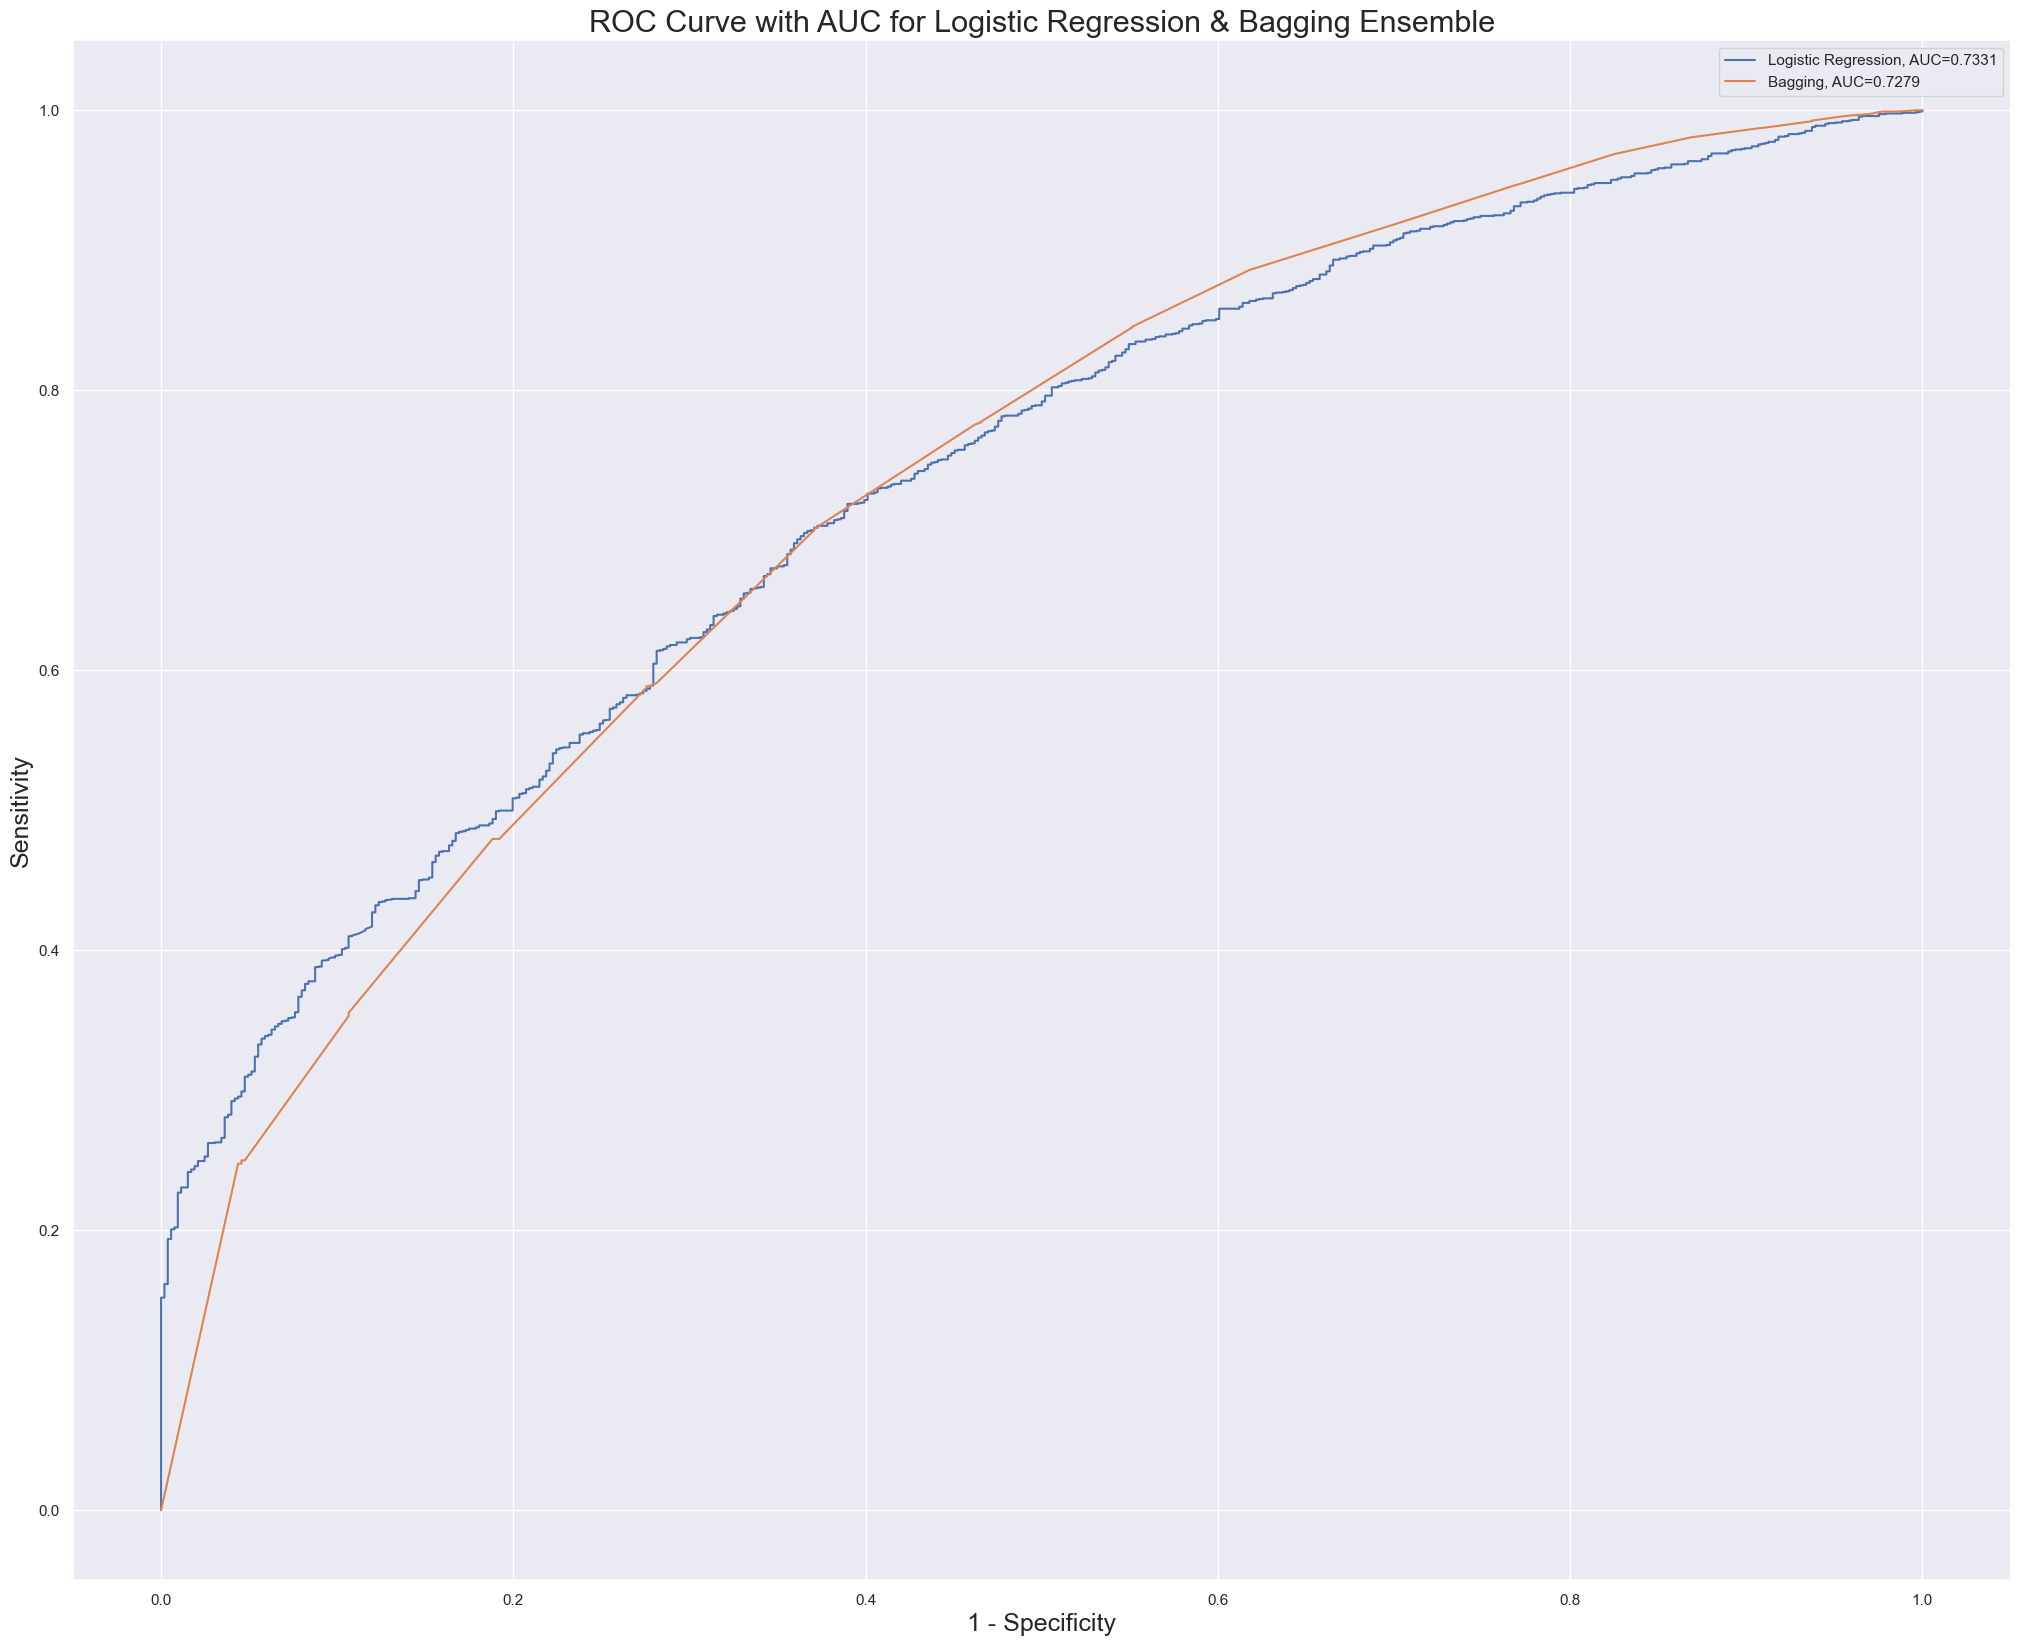

In [286]:
#set up plotting area
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
#model = LogisticRegression()
#model.fit(X_train, y_train)
Y_pred = lr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(Y_test, Y_pred)
auc = round(metrics.roc_auc_score(Y_test, Y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit Bagging model and plot ROC curve
#model = GradientBoostingClassifier()
#model.fit(X_train, y_train)
Y_pred = bg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(Y_test, Y_pred)
auc = round(metrics.roc_auc_score(Y_test, Y_pred), 4)
plt.plot(fpr,tpr,label="Bagging, AUC="+str(auc))

# Label axes.
plt.title(f"ROC Curve with AUC for Logistic Regression & Bagging Ensemble", fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)
#add legend
plt.legend()